<big>**<center>Lab 3<br> Pavlos Logdanidis 2071 ,  Vasilopoulos Vasileios 2024<center>**<big>

# Nonlinear Unconstrained Optimization

# 1D Optimization
\begin{definition}


The process of finding the minima or maxima of a function. Consider a function:

$$f: \mathbf{R} \rightarrow \mathbf{R}$$
$$f',f'' \text{ continuous}$$

A point $x^*$ is a *global* maximum if:

$$f(x) \le f(x^*) \, \forall \, x$$

or a *local* maximum if:

$$f(x) \le f(x^*) \, \forall \, x:|x-x^*| < \epsilon$$

**Necessary conditions**: $f'(x^*) = 0$

**Sufficient conditions**: $f''(x^*) \le 0$ 


\end{definition}

\begin{definition}

A function $f$ is convex if for every $0 \le \alpha \le 1$ $f$ satisfies the relation 
$$f(\alpha x_1 + (1 - \alpha)x_2) \le \alpha f(x_1) + (1 - \alpha)f(x_2)$$

![convexity](convexity.png)

\end{definition}

\begin{remark}

In case of convex functions the local extreme points are global extreme points.

\end{remark}



## Search
\begin{remark}


We will consider *local* search methods that generate a series of values that converge to the maximum:

$$x_0, x_1, x_2, \ldots \rightarrow \text{argmax}(f)$$

As with the root-finding methods, we must identify stopping conditions:

$$|x_i - x^*| \le \epsilon$$

Since we do not know $x^*$, we must use an alternative criterion:

* $|x_i - x_{i-1}| \le \epsilon$
* $|f(x_i) - f(x_{i-1})| \le \epsilon$
* $|f'(x_i)| \le \epsilon$
\end{remark}

## Newton's Method
\begin{remark}
Apply Newton-Raphson method for root-finding to $f'$:

$$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}$$

called ***Newton's method***.

Since we are searching for $x^*$ such that $f'(x^*) = 0$, we will use $|f'(x_i)| \le \epsilon$ as our stopping criterion.

This finds points for which $f'(x)=0$.

Note that $f(x_{i+1}) = f(x_i) + f'(x_i)(x-x_i) + \mathbf {higher terms}$
\end{remark}

![l-a](linear_appr.png)

In [1]:
# R Code
newton <- function(f, x0, tol = 1e-9, n_max = 100) {
    x <- x0
    f_x <- f(x)
    n <- 0
    while ((abs(f_x[2]) > tol) & (n < n_max)) {
        # Newton's update
        x <- x - f_x[2]/f_x[3]
        f_x <- f(x)
        # Increment counter
        n <- n + 1
    }
    if (n == n_max) {
        cat('newton failed to converge\n')
    } else {
        return(x)
    }
}


\begin{remark}
To use `newton`, we need a function $f$ that contains a vector $(f(x), f'(x), f''(x))$.

\end{remark}


\begin{example}
Let's try to find the maximum of a Gamma(3,2) distribution:
\end{example}


[1] 1

[1] 1.846855e-17

[1] 20

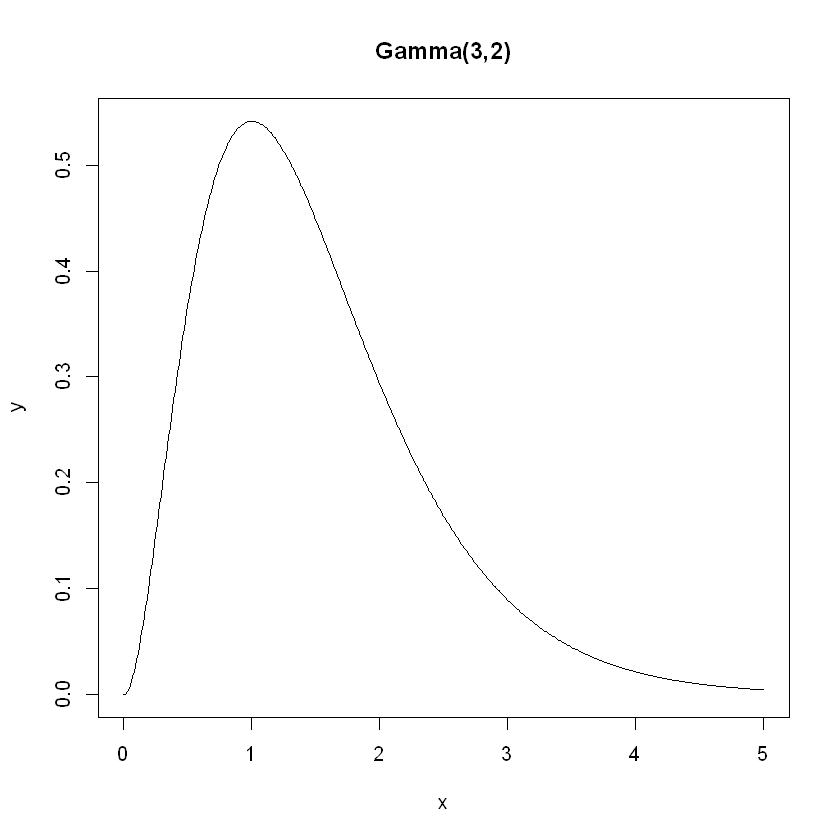

In [2]:
gamma32 <- function(x) {
    # Error checking
    if (x < 0) 
        return(c(0, 0, 0))
    if (x == 0) 
        return(c(0, 0, NaN))
    y <- exp(-2 * x)
    return(c(4 * x^2 * y, 8 * x * (1 - x) * y, 8 * (1 - 2 * x^2) * y))
}

x <- seq(0, 5, by = 0.01)
plot(x, sapply(x, gamma32)[1, ], ylab = "y", main = "Gamma(3,2)", type = "l")

newton(gamma32, 4)
newton(gamma32, 0.1)
newton(gamma32, 20)

# notice the dependence of the method from the specified initial point


\begin{theorem}
**Convergence**

Using Newton's algorithm, $x_i \rightarrow x^*$ converges quickly to maximum extreme point of $f$, provided:

1. $f'(x^*)=0$
2. $f''(x^*)<0$
3. $f''$ is *Lipschitz-continuous* in the neighborbood of $x^*$

> Lipschitz continuous if there exists a $k$ such that:
>
> $|f''(x) - f''(y)| \le k|x-y| \, \forall \, x,y$

\end{theorem}

\begin{remark}
Note that Newton's method requires 2 derivatives!
\end{remark}



\begin{definition}
**Bisection Method**

To use the bisection method to find the minimizer, we can

1) Pick 2 points, $x_1$ and $x_2$, with $x_1 < x_2$ and both points in [a, b].

2) Find $f(x_1)$ and $f(x_2)$.

3) a) If $f(x_1) > f(x_2$), then the minimizer must be to the right of $x_1$, because this unique minimizer must be less than $f(x_1)$, and the function is decreasing from $x_1$ to $x_2$.

b) Otherwise (i.e. $f(x_1) < f(x_2)$), the minimizer must be to the left of $x_2$ with logically analogous reasoning.

4) i) If 3a is true, then the minimizer must be in the interval $[x_1, b]$; repeat the algorithm from Step 1 until the interval length is smaller than some pre-set tolerance.

ii) If 3b is true, then the minimizer must be in the interval $[a, x_2]$; repeat the algorithm from Step 1 until the interval length is smaller than some pre-set tolerance.
To summarize this algorithm, every iteration beings with

- the boundaries of the interval $[a_j, b_j]$ ,

- 2 test points for the argument, $x_1$ and $x_2$.

The function is evaluated at $x_1$ and $x_2$, and, based on whether $f(x_1) > f(x_2)$ or $f(x_1) < f(x_2)$, a new set of boundaries and test points are set for the next iteration.

\end{definition}


\begin{definition}
**Golden Section Method**

Using the Golden Ratio to Set the Test Points

Since the test points $x_1$ and $x_2$ are arbitrarily set, it comes as no surprise that the choice of the test points affects the speed of the computation.  A clever way to save computation time is to set the test points to take advantage of some special properties of the golden ratio, which Braun and Murdoch denote with $\phi$ and has the value

$$(1 + \sqrt{5}) \div 2$$
This number has many special properties that you can easily find on the web.  The one that will save computation time is

$$\phi^{-2} = 1 - \phi^{-1}$$
Let the lower and upper bounds of the interval of interest be a  and b , respectively.  Now, let's set the test points as

$$x_1 = b - (b - a) \div \phi$$
$$x_2 = a + (b - a) \div \phi$$
The advantage of setting the test points as these above values comes when one of the new test points is updated.  Suppose that

$f(x_1) > f(x_2)$ .

Then the minimizer must be to the right of $x_1$.  Thus, $x_1$ becomes the new lower bound, which is denoted as $a'$.  The beauty of the golden ratio comes in calculating the new lower test point, which we denote as $x_1'$.

$$x_1' = b - (b - a') \div \phi$$
Since $f(x_1) > f(x_2)$ , $x_1$ becomes the new lower bound.

$$x_1' = b - (b - x_1) \div \phi$$
Recall that

$$x_1 = b - (b - a) \div \phi$$
Substituting the right-hand side of this above equation for $x_1$ in the calculation of $x_1'$, some very simple algebraic manipulation yields

$$x_1' = b - (b - a) \div \phi^2$$
Now, taking advantage of that special property of the golden ratio, $\phi^{-2} = 1 - \phi^{-1}$ , some more simple algebraic manipulation yields

$$x_1' = a + (b - a) \div \phi = x_2$$
Thus, the new lower test point is just the old upper test point.  This saves computation time, because we don't need to compute a new lower test point; we can just recycle the value that we knew from the old upper test point!

Similar logic for the case $f(x_1) < f(x_2)$ will show that the new upper test point is simply the old lower test point.  Notationally, if

$f(x_1) < f(x_2)$,

then

$x_2' = x_1$.

\end{definition}
The Golden Section method does not require the use of derivatives.


Let $f: \mathbf R \rightarrow \mathbf R$. Consider 3 points $a < c < b$ such that:

$$f(a) \le f(c)$$
$$f(b) \le f(c)$$

this implies that there must be a local maximum in $[a,b]$.


 ![gs](gs.png)


\begin{definition}
** Algorithm**

Choose $x_a, x_b, x_c$ such that:

$$x_a < x_c < x_b$$

While $x_b - x_a > \epsilon$:

* if $x_b - x_c > x_c - x_a$, choose $y \in (x_c, x_b)$:

    - if $f(y) \ge f(x_c)$:

        + $x_a = x_c$
        + $x_c = y$

    - else:

        + $x_b = y$

* else if $x_b - x_c < x_c - x_a$, choose $y \in (x_a, x_c)$:

    - if $f(y) \ge f(x_c)$:

        + $x_b = x_c$
        + $x_c = y$

    - else:

        + $x_a = y$

So, $y$ stays in the larger of the two intervals.

\end{definition}


\begin{remark}
**Golden Section Method**

The Golden Section Method chooses $y$ such that the ratio of lengths of the larger to the smaller interval stays the same at each iteration:

$$\begin{aligned}
\text{let } a &= x_c -x_a \cr
b &= x_b - x_c \cr
c &= y - x_c
\end{aligned}$$

this implies: $\frac{c}{b} = \frac{b}{a}$ or $\frac{c}{a-c} = \frac{b}{a}$

![GS line](gsline.png)
\end{remark}


\begin{remark}
**Golden Ratio**


Let $\phi$ be the ratio $a/b$. Solve for $c$:

$$\begin{aligned} &\Rightarrow \phi^2 - \phi - 1 = 0 \cr
&\Rightarrow \phi = \frac{1 + \sqrt{5}}{2} = 1.61680339 \ldots
\end{aligned}$$

This is the ***Golden Ratio***.

![Golden ratio](http://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/SimilarGoldenRectangles.svg/200px-SimilarGoldenRectangles.svg.png)

\end{remark}


\begin{remark}
**Choosing $y$**

Note that:

$$\begin{aligned}a &= b + c \cr
\Rightarrow c &= b/(1+\phi)
\end{aligned}$$

Therefore, $y$ can be calculated by:

$$\begin{aligned}y &= x_c + c \cr
&= x_c + \frac{x_b - x_c}{1 + \phi}
\end{aligned}$$

At each iteration, the width of the bracketing interval is reduced by a factor of $\phi/(1+\phi)$

This is *optimal*


**Presenter Notes**


>The initial choice of $x_c$ is not critical; ratio will be restored a first iteration.


\end{remark}


\begin{exercise}
Apply the above algorithms  to find the global minimum of $f(x) = x^2$. Compare the algorithms in time and number of iterations to find the minimum for a given accuracy. Display the function and the points found by the algorithms  at each iteration in the same graph.
\end{exercise}


### Newton

In [58]:
x_squared <- function(x){
    
    return (c(x^2,2*x,2))   
    
}

In [61]:



newton <- function(f, x0, tol = 1e-9, n_max = 100) {
    
    xx<-seq(-x0-2,x0+2,length=1000)
    yy<-seq(1,length(xx))
    for(k in seq(1,length(xx))){
    
        yy[k]<-f(xx[k])[1]
        
    }
    plot(xx,yy,col='green',type='l',xlim=c(-x0-2,x0+2), ylim=c(-1,f(x0)[1]+10))
    par(new=T)
    plot(x0,f(x0)[1],col='red',axes=F, xlab='', ylab=''
         ,xlim=c(-x0-2,x0+2), ylim=c(-1,f(x0)[1]+10))
    legend("topleft",legend=c("x0","x next"),col=c("red","blue"),pch = 1)
    
    
    x <- x0
    f_x <- f(x)
    n <- 0
    while ((abs(f_x[2]) > tol) & (n < n_max)) {
        # Newton's update
        x <- x - f_x[2]/f_x[3]
        f_x <- f(x)
        # Increment counter
        n <- n + 1
        
   
         par(new=T)
         plot(x,f(x)[1],col='blue',axes=F, xlab='', ylab=''
             ,xlim=c(-x0-2,x0+2), ylim=c(-1,f(x0)[1]+10))
        
        
        
    }
    if (n == n_max) {
        cat('newton failed to converge\n')
    } else {
        
        
        cat('Number of iterations :',n)
        return(x)
    }
}

Number of iterations : 1

   user  system elapsed 
   0.03    0.00    0.03 

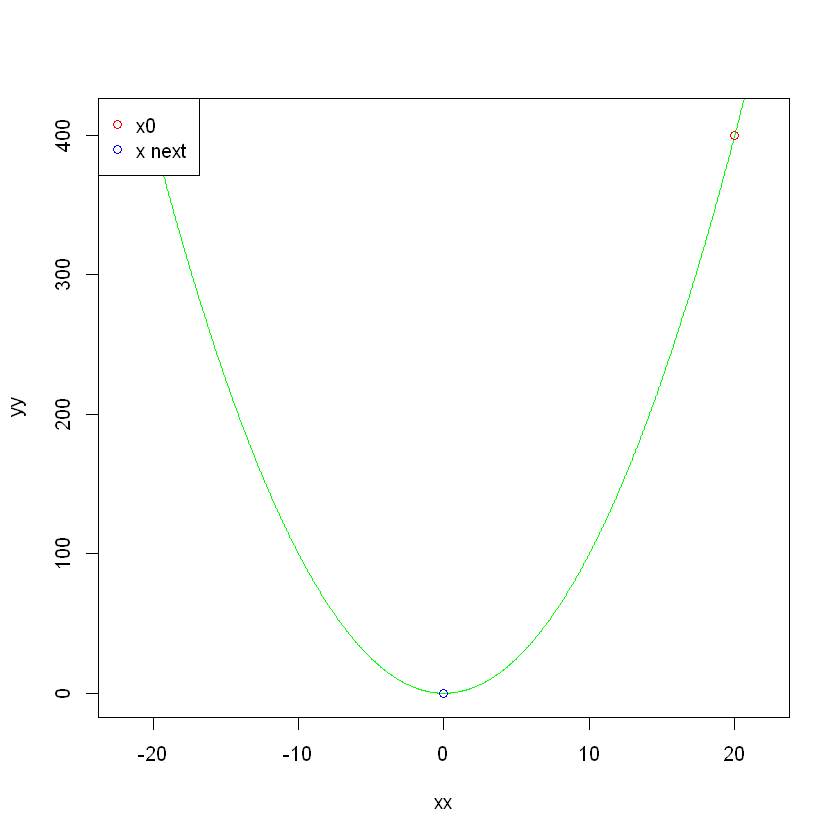

In [62]:
system.time(newton(x_squared,20))

### Bisection

In [63]:
bisection <- function(f, a, b, tol = 1e-9, n_max = 100) {
    cat("Bisection Method:\n")
    a0 <- a
    b0 <- b
    x1 <- a + 0.2*(b-a) #initializing x1
    x2 <- b - 0.3*(b-a) #initializing x2
    f_x1 <- f(x1)
    f_x2 <- f(x2)
    f_xold1 <- f(a)
    f_xold2 <- f(b)
    n <- 0
    xx <- seq(a,b,length.out = 100)
    yy <- xx^2
    plot(xx,yy,type='l',col="black",xlim = c(a0-10,b0+10), ylim = c(0,(b0+a0)^2))   #plotting function based on our a,b inputs
    par(new=T)
    while ((abs(f_x1[2]-f_xold1[2]) > tol) & (abs(f_x2[2]-f_xold2[2]) > tol) & (n < n_max)  & (abs(x1-a)>tol) & (abs(b-x2)>tol) ){
        f_xold1 = f(x1)
        f_xold2 = f(x2)
        if(f_x1[1] > f_x2[1]){
            a <- x1              #setting x1 as our new left bound
            x1 <- a + 0.2*(b-a)  #new x1
            x2 <- b - 0.3*(b-a)  #new x2
            f_x1 <- f(x1)           
            f_x2 <- f(x2)
            plot(x1,f_x1[1],col = "green", axes = F,xlab = "", ylab = "", xlim = c(a0-10,b0+10), ylim = c(0,(b0+a0)^2)) #plotting new x1 that's closer to the solution than the prev one
            par(new=T)
        } else if (f_x1[1] < f_x2[1]){
            b <- x2             #setting x2 as our new right bound
            x1 <- a + 0.2*(b-a) #new x1
            x2 <- b - 0.3*(b-a) #new x2
            f_x1 <- f(x1)
            f_x2 <- f(x2)
            plot(x2,f_x2[1],col = "orange", axes = F,xlab = "", ylab = "", xlim = c(a0-10,b0+10), ylim = c(0,(b0+a0)^2)) #plotting new x2 that's closer to the solution than the prev one
            par(new=T)
        }
        n <- n + 1
        #cat("\nNumber of iterations: ",n)
    }
    legend("topleft",legend=c("bisection x1", "bisection x2"),
       col=c("green","orange"),pch = 1)
    cat("\nBisection Method iterated",n," times")
    if (n == n_max) {
        cat('\nbisection failed to converge')
    }
    if (f_x1[1] > f_x2[1]){
        return (f_x1[1])
    }else
        return (f_x2[1])
    
}

In [64]:
x_squared <- function(x) {
    return(c(x^2, 2*x, 2))
}

Bisection Method:

Bisection Method iterated 84  times

   user  system elapsed 
   0.06    0.00    0.06 

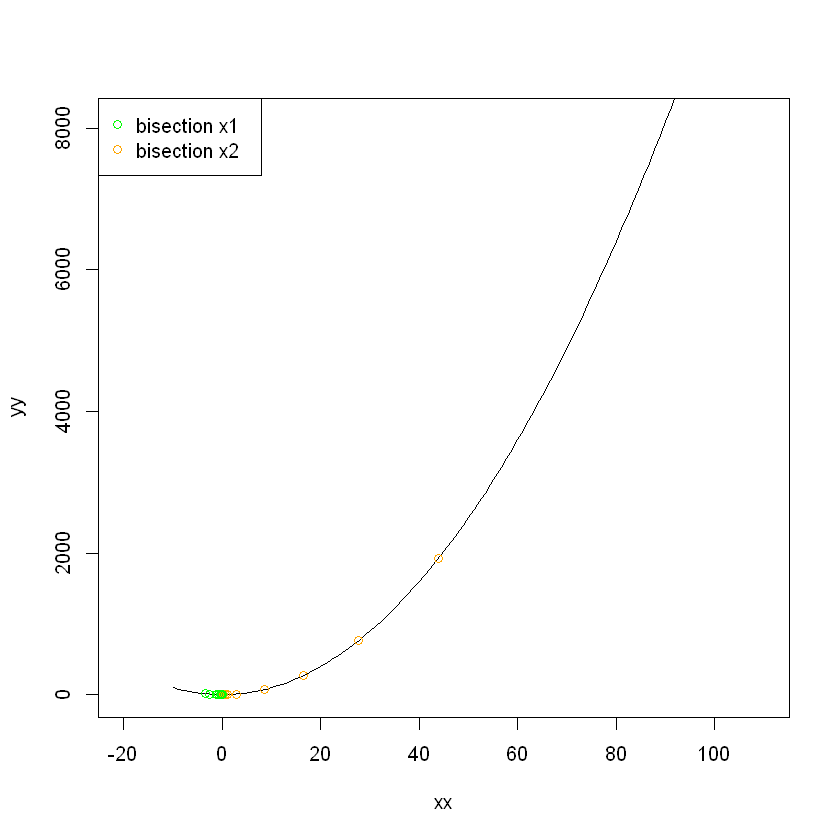

In [65]:
system.time(bisection(x_squared,-10,100))

### Golden Section

In [93]:
goldensection <- function(f, a, b, tol = 1e-9, n_max = 100) {
    cat("Golden-Section Method:\n")
    a0 <- a
    b0 <- b
    phi <- (1+sqrt(5))/2
    x1 <- b - (b-a)/phi #initializing x1
    x2 <- a + (b-a)/phi #initializing x2
    f_x1 <- f(x1)
    f_x2 <- f(x2)
    f_xold1 <- f(a)
    f_xold2 <- f(b)
    n <- 0
    xx <- seq(a,b,length.out = 100)
    yy <- xx^2
    plot(xx,yy,type='l',col="black",xlim = c(a0-10,b0+10), ylim = c(0,(b0+a0)^2))   #plotting function based on our a,b inputs
    par(new=T)
    while ((n < n_max)  & (abs(x1-a)>tol) & (abs(b-x2)>tol) ){
        f_xold1 = f(x1)
        f_xold2 = f(x2)
        if(f_x1[1] >= f_x2[1]){
            a <- x1              #setting x1 as our new left bound
            x1 <- b - (b-a)/phi  #new x1
            x2 <- a + (b-a)/phi  #new x2
            f_x1 <- f(x1)           
            f_x2 <- f(x2)
            plot(x1,f_x1[1],col = "blue", axes = F,xlab = "", ylab = "", xlim = c(a0-10,b0+10), ylim = c(0,(b0+a0)^2),pch = 7) #plotting new x1 that's closer to the solution than the prev one
            par(new=T)
        } else if (f_x1[1] < f_x2[1]){
            b <- x2             #setting x2 as our new right bound
            x1 <- b - (b-a)/phi #new x1
            x2 <- a + (b-a)/phi #new x2
            f_x1 <- f(x1)
            f_x2 <- f(x2)
            plot(x2,f_x2[1],col = "black", axes = F,xlab = "", ylab = "", xlim = c(a0-10,b0+10), ylim = c(0,(b0+a0)^2),pch =7) #plotting new x2 that's closer to the solution than the prev one
            par(new=T)
        }
        n <- n + 1
        #cat("\nNumber of iterations: ",n)
    }
    legend("topleft",legend=c("golden-section x1", "golden-section x2"),
       col=c("blue","black"),pch = 7)
    cat("\nGolden-Section Method iterated",n," times")
    if (n == n_max) {
        cat('\nGolden-Section failed to converge')
    }
    if (f_x1[1] > f_x2[1]){
        return (f_x1[1])
    }else
        return (f_x2[1])
    
}

Golden-Section Method:

Golden-Section Method iterated 47  times

   user  system elapsed 
   0.05    0.01    0.06 

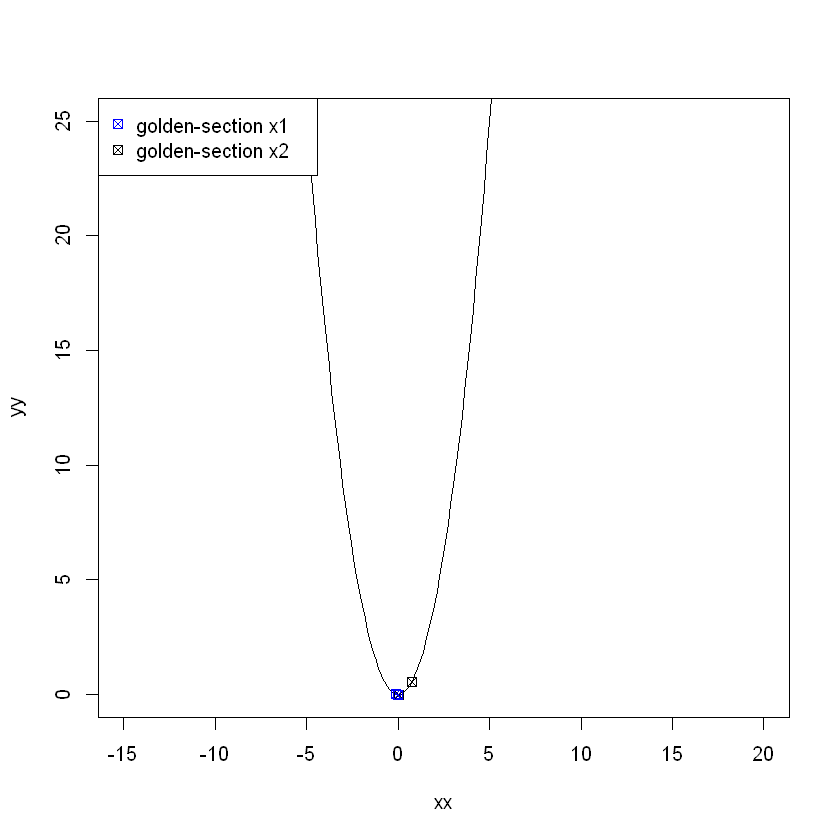

In [94]:
system.time(goldensection(x_squared,-5,10))

### Ternary

In [101]:
ternary <- function(ftn, x.l, x.r, x.m, tol = 1e-9,nmax=100) {
    cat("Ternary Search Method:\n")
  # applies the ternary search algorithm to minimize ftn
  # we assume that ftn is a function of a single variable
  # and that x.l < x.m < x.r and ftn(x.l), ftn(x.r) >= ftn(x.m)
  
  # the algorithm iteratively refines x.l, x.r, and x.m and terminates
  # when x.r - x.l <= tol, then returns x.m
    
    left=x.l#plot lim
    right=x.r#plot lim
    
  
    n <- 0
    xx <- seq(x.l,x.r,length.out = 100)
    yy <- xx^2
    plot(xx,yy,type='l',col="black",xlim = c(left,right),
         ylim = c(-10,10))   
    par(new=T)
    legend("topleft",legend=c("x left","x mid","x right"), col=c("blue","green","red"),pch =13)
     par(new=T)
    
    
  # golden ratio plus one
  gr1 = 1 + (1 + sqrt(5))/2
  # successively refine x.l, x.r, and x.m
  f.l = ftn(x.l)[1]
  f.r = ftn(x.r)[1]
  f.m = ftn(x.m)[1]
  while (((x.r - x.l) > tol)& (n<nmax)) {  
      
    if ((x.r - x.m) > (x.m - x.l)) {
      y = x.m + (x.r - x.m)/gr1
      f.y = ftn(y)[1]
      if (f.y <= f.m) {
        x.l = x.m
        f.l = f.m
        x.m = y
        f.m = f.y
        } else {
          x.r = y
          f.r = f.y
          }
      } else {
        
        y = x.m - (x.m - x.l)/gr1
        f.y = ftn(y)[1]
        if (f.y <= f.m) {
          x.r = x.m
          f.r = f.m
          x.m = y
          f.m = f.y
          } else {
            x.l = y
            f.l = f.y
            }
        }
       n <- n + 1
      plot(x.l,ftn(x.l)[1],col = "blue", axes = F,xlab = "", ylab = "",pch = 13,xlim=c(left,right),ylim=c(-10,10)) 
      par(new=T)
      plot(x.m,ftn(x.m)[1],col = "green", axes = F,xlab = "", ylab = "",pch = 13,xlim=c(left,right),ylim=c(-10,10)) 
      par(new=T)
      plot(x.r,ftn(x.r)[1],col = "red", axes = F,xlab = "", ylab = "",pch = 13,xlim=c(left,right),ylim=c(-10,10)) 
      par(new=T)
      
    }
    cat("\nTernary Search Method iterated",n," times")
  return(x.m)
  }

For ternary search we assume that ftn is a function of a single variable
   and that x.l < x.m < x.r and ftn(x.l), ftn(x.r) >= ftn(x.m).For our function $f(x)=x^2$ ,we can choose starting points $x_l=-5$ $x_m=-2$ $x_r=4$

Ternary Search Method:

Ternary Search Method iterated 48  times

   user  system elapsed 
   0.07    0.00    0.07 

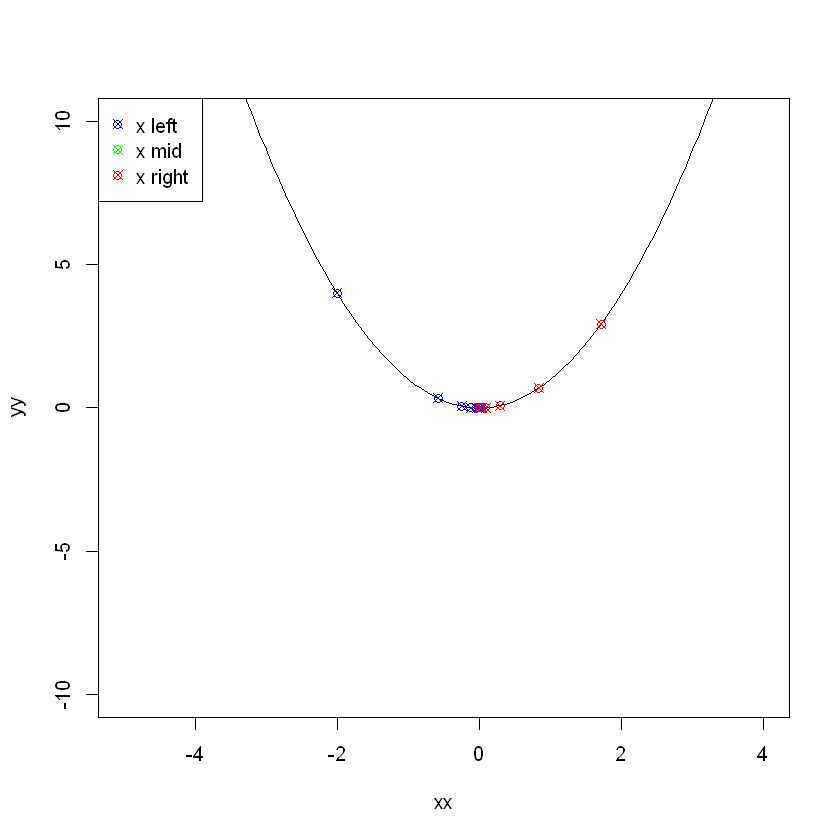

In [102]:
system.time(ternary(x_squared,-5,4,-2))

# Multivariate Optimization


We may wish to find the maximum or minimum of a function of several variables:

$$f:\mathbf{R}^k \rightarrow \mathbf{R}$$

Assume:

* first- and second-order partial derivatives exist, and are everywhere continuous.

$$\begin{aligned}
\mathbf{x} &= (x_1, x_2, \ldots, x_k) \cr
&= x_1 \mathbf{e}_1 + x_2 \mathbf{e}_2, + \ldots + x_k \mathbf{e}_k
\end{aligned}$$

where $\mathbf{e}_i$ is the coordinate vector of element $i$.

### Critical Points
![c-p](critical_points.png)

### Multiple  directions  for searching  for  maximum  or minimum  of the function
![m-d](multiple_directions.png)

## Directional derivatives

### Slope of slice

![slope-slice](slope_slide.png)


To find the derivative of $z = f(x, y)$ at $(x_0, y_0)$ in the direction of the unit vector ${\bf u} = \langle u_1, u_2 \rangle$ in the
xy-plane, we introduce an s-axis, as in Figure 1, with its origin at $(x_0, y_0)$, with its positive direction in
the direction of $ \bf u$, and with the scale used on the x- and y-axes. Then the point at $s$ on the s-axis has
xy-coordinates $x = x_0 + su_1$, $y = y_0 + su_2$, and the value of $z = f(x, y) $ at the point s on the s-axis is
$$ F(s) = f(x_0 + su_1, y_0 + su_2)$$.

We call $z = F(s)$ the cross section through $(x_0, y_0)$ of $z = f(x, y)$ in the direction of $\bf u$.


![slice-def](directional-derivative.png)


\begin{definition}
The directional derivative  of $z = f(x,y)$ at $(x_0,y_0)$ in the unit vector 
${\bf u} = \langle u_1, u_2 \rangle $ is the derivative of the cross section  defined above at $s=0$

$$D_{\bf u}f(x_0,y_0) = [\frac{d}{ds}f(x_0+su_1,y_0+su_2)]_{s=0}$$
\end{definition}


\begin{theorem}
For any unit vector ${\bf u} = \langle u_1, u_2 \rangle$, the directional derivative of $z=f(x,y)$ at $(x_0,y_0)$ in the direction of $\bf u$ is
$$D_{\bf u} = f_x(x_0,y_0)u_1+f_y(x_0,y_0)u_2$$.

\end{theorem}


\begin{definition}

The gradient vector at $(x_0,y_0)$ is 

$$\nabla f(x_0,y_0) = \langle f_x(x_0,y_0), f_y(x_0,y_0) \rangle$$

\end{definition}


\begin{exercise}

Find the directional derivative of $f(x,y) = -4xy-x^4/4-y^4/4$ at $(1,-1)$ in the direction of ${\bf u} = \langle \sqrt(2)/2,-\sqrt(2)/2 \rangle$
\end{exercise}


In [8]:
library(Deriv)

f<-function(x,y){    -4*x*y^2-x^4/4 -y^4/4   }

In [9]:
u<-c(sqrt(2)/2,-sqrt(2)/2)

#using Theorem 2
Du=Deriv(f,"x")(1,-1)*u[1] + Deriv(f,"y")(1,-1)*u[2]

cat('Directional derivative of f at (1,-1) in the direction of u =',Du)

Directional derivative of f at (1,-1) in the direction of u = -9.899495

## Partial Derivatives

![tanget_plane](tanget_plane.png)


Denote the $i$th partial derivative with respect to $x_i$ as $f_i(x)=\frac{\partial f(\mathbf{x})}{\partial x_i}$ slopes of the tanget lines in x and y.

![partial](partial.jpg)

Directional Derivatives : In general  $v \in R^2$ with $\|v\| =1$ then $\frac{\partial f(x,y)}{\partial v}$

![directional](directional.jpg)

And we define the *gradient*:

$$\nabla f(\mathbf{x}) = (f_1(\mathbf{x}), \ldots, f_k(\mathbf{x}))'$$

![gradient](gradient2.png)

\begin{remark}
** the gradient properties**

The gradient defines (hyper) plane approximating the function infinitesimally
$$\Delta z = \frac{\partial f(x,y)}{\partial x} \Delta x + \frac{\partial f(x,y)}{\partial y} \Delta y $$

\end{remark}

![gradient_h](gradient_hyperplane.jpg)

\begin{remark}

By the chain rule: (important for later use)

If $\|v\| = 1$  then $\frac{\partial f(x,y)}{\partial v} (p) = \langle \nabla f_p, v \rangle  $ (inner product)


\end{remark}

![dir_grad_rel](d_g_r2.png)


\begin{proposition}

$\frac{\partial f(x,y)}{\partial v} (p)$ maximal choosing $v = \frac{1}{\|\nabla f_p \|} \dot  \nabla f_p$ 

$\frac{\partial f(x,y)}{\partial v} (p)$ minimal choosing $v= \frac{-1}{\|\nabla f_p \|} \dot  \nabla f_p$

\end{proposition}

\begin{proof}
$\frac{\partial f(x,y)}{\partial v} (p) = \langle \nabla f_p,  \frac{-1}{\|\nabla f_p \|} \dot  \nabla f_p \rangle $

$= \frac{-1}{\|\nabla f_p \|} \dot {\langle \nabla f_p, \nabla f_p \rangle} = \frac{-{\| \nabla f_p\|}^2}{\|\nabla f_p\|}=-\|\nabla f_p \|
 $
 
For general direction vector $v$ we have 
$| \frac{\partial f(x,y)}{\partial v} (p)| = | \langle \nabla f_p, v \rangle | \le \|\nabla f_p\|$

which implies that 

$\frac{\partial f(x,y)}{\partial v} (p) \ge - \|\nabla f_p\|$
\end{proof}


\begin{remark}

The gradient points at the greatest change direction

\end{remark}


\begin{proposition}
Let $f: R^n \rightarrow R$ be a smooth function around point $p$ if $f$ has a **local minimum** (maximum) at $p$ then 

$$\nabla f_p = \vec 0$$
\end{proposition}

(intuitive: necessary for local min (max))

![gradient_0](gradient_zero.jpg)

\begin{proof}
For any direction vector $v \in R^n $ other than zero

$$ 0 = \frac{df(p+t v)}{dt}(0) = \langle (\nabla f)_p, v \rangle$$

which implies $ (\nabla f)_p = \vec 0$
\end{proof}


## Hessian (The Role of Second Partial Derivatives)

And the *hessian*:

$$H(\mathbf{x}) = \left(
\begin{array}{ccc}
\frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_k} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(\mathbf{x})}{\partial x_k \partial x_1} & \cdots & \frac{\partial^2 f(\mathbf{x})}{\partial x_k \partial x_k}
\end{array}\right)$$

## Curvature

\begin{definition}
For any vector other than $\mathbf{0}$, the slope at $\mathbf{x}$ in direction $\mathbf{v}$ is given by:

$$\frac{\mathbf{v}' \nabla f(\mathbf{x})}{||\mathbf{v}||}$$

where $||\mathbf{v}||$ is the *euclidean norm* of $\mathbf{v}$.

$$||\mathbf{v}|| = \sqrt{v_1^2 + \ldots + v_k^2} = \sqrt{\mathbf{v} \cdot \mathbf{v}}$$

The *curvature* at point $\mathbf{x}$ is:

$$\frac{\mathbf{v}' H(\mathbf{x}) \mathbf{v}}{||\mathbf{v}||^2}$$
\end{definition}



# Conditions for Maximum


$f$ has a local maximum $x^*$ if, for all $i=1,\ldots,k$ and sufficiently small $\epsilon$:

$$f(\mathbf{x^*} + \epsilon \mathbf{e}_i) \le f(\mathbf{x^*})$$

provided that:

$$\nabla f(\mathbf{x^*}) = \mathbf{0} = (0,\ldots,0)'$$ 

(*necessary* condition) 

and the slope at $x^*$ in direction $v$ is $\le 0$. 

This implies that the Hessian is negative semi-definite.

A *sufficient* condition is that the slope $v$ is $< 0$ (negative definite Hessian  $\Rightarrow$ curvature negative ).


## Review: Fundamentals of unconstrained optimization

%%latex
Assuming the derivatives $\nabla f(x^*)$, $ \nabla^2 f(x^*) = H(x^*)$ exist and are continuous in the neighborhood of $x^*$

* $x^*$ is a local minimizer $\Rightarrow$ (necessary conditions)

\[
\cases {
    \nabla f(x^*) = 0 & \text{ (first order)} \cr
    \nabla^2 f(x^*) = H(x^*) & \text{psd  (second order)}
}
\]

* $\nabla f(x^*)=0$, $\nabla^2 f(x^*)$ pd $\Rightarrow$ $x^*$ is a strict local minimizer (sufficient condition).

* Stationary point: $\nabla f(x^*)=0$; 

\[\nabla^2 f(x^*) 
\cases {\text { pd: strict local minimizer} \cr
\text { nd: strict local maximizer} \cr
\text { not definite (pos & neg eigenvalues): saddle point} \cr
\text { psd: may be non-strict local minimizer} \cr
\text { nsd: may be non-strict local maximizer}
}
\]

\begin{definition}
Properties of Hessian matrix
* pd = positive definite

* nd = negative definite

* psd = positive semidefinite

* nsd = negative semidefinite

* https://en.wikipedia.org/wiki/Positive-definite_matrix}
\end{definition}





## Meaning of Eigenvalues of Hessian

\begin{definition}
If the Hessian at a given point has all positive eigenvalues, it is 
said to be a positive-definite matrix

* This is the multivariable 
equivalent of “concave up”.

![concave_up](concave_up.png)

If all of the eigenvalues 
are negative, it is said to be a 
negative-definite matrix

* This is the multivariable 
equivalent like “concave down"

![concave_down](concave_down.png)

If either eigenvalue is 0, then you will need more 
information (possibly a graph or table) to see what 
is going on.

And, if the eigenvalues are mixed (one positive, one 
negative), you have a 
saddle point
![saddle_point](saddle_point.png)

\end{definition}





# Classification of nonlinear unconstrained methods

### Direct search methods
\begin{itemize}
\item Random search method
\item Grid search method
\item Univariate method
\item Pattern search methods
\item Powell’s method
\item Hooke-Jeeves method
\item Rosenbrock’s method
\item Simplex method
\end{itemize}




### Descent methods

\begin{enumerate}
\item Steepest descent (Cauchy method)
\item Fletcher-Reeves method
\item Newton’s method
\item Marquardt method
\item Quasi-Newton methods
\item Davidon-Fletcher-Powell method
\item Broyden-Fletcher-Goldfarb-Shanno method
\end{enumerate}





## Steepest Ascent


The steepest ascent method is an iterative search algorithm. For a function $f:\mathbf{R}^k \rightarrow \mathbf{R}$ with continuous partial derivatives, we iterate via:

$$\mathbf{x}_{i+1} = \mathbf{x}_i + \alpha \mathbf{v}_{i}^*$$

where:

* $\alpha$ = positive scalar step size
* $\mathbf{v}_{i}^*$ = direction of largest slope at position $i$

$$\mathbf{v}_{i}^* = \text{argmax}_{\mathbf{v}} \frac{\mathbf{v}' \nabla f(\mathbf{x}_i)}{||\mathbf{v}||}$$

How do we find this direction?


How big of a step do we take?

## Steepest Descent


The steepest ascent method is an iterative search algorithm. For a function $f:\mathbf{R}^k \rightarrow \mathbf{R}$ with continuous partial derivatives, we iterate via:

$$\mathbf{x}_{i+1} = \mathbf{x}_i - \alpha \mathbf{v}_{i}^*$$

where:

* $\alpha$ = positive scalar step size
* $\mathbf{v}_{i}^*$ = the opposite direction of maximun slope at position $i$

$$\mathbf{v}_{i}^* = \text{argmax}_{\mathbf{v}} \frac{\mathbf{v}' \nabla f(\mathbf{x}_i)}{||\mathbf{v}||}$$

How do we find this direction?


How big of a step do we take?

## Line search methods for the steepest descent


**Iteration**: $x_{k+1}=x_k + \alpha_k p_k$, where $\alpha_k$ is the *step length* (how far to move along $p_k$), $\alpha_k > 0$, $p_k$ is the *search direction*

**Descent direction**: $p^T_k\nabla f_k = \|p_k\|\|\nabla f_k\|\cos(\theta_k) < 0$ ( angle < $\pi/2$ with $-\nabla f_k$) guarrantes that $f$ can be reduced along $p_k$ (for sufficiently small step):

According to Taylor's Th. 

$$f(x_k+ \alpha p_k) = f(x_k)+ \alpha p^T_k\nabla f_k +\mathcal{O}(\alpha^2) $$

For all for all sufficiently small $\alpha > 0$ we get 

$$ f(x_k+ \alpha p_k) < f(x_k)  $$

**The steepest descent direction**, i.e. the direction along which $f$ decreases the most is $p_k=-\nabla f_k$. 

Pf. for any $p$, $\alpha$ according to Taylor's th.:

$$f(x_k+ \alpha p) = f(x_k)+ \alpha p^T\nabla f_k +\mathcal{O}(\alpha^2)$$

so the rate of change in $f$ along $p$ at $x_k$ is $p^T\nabla f_k$ (the directional derivative) = $\|p\|\|\nabla f_k\|\cos(\theta)$.

Then the $$min_p p^T\nabla f_k$$ s.t. $\|p\| = 1$ is achieved when $\cos\theta = -1$, i.e., $$p = - \nabla f_k / \|\nabla f_k|$$

**prove** that this direction is $\perp$ to the contours of $f$. 

let $z = f(x,y)$ show that at $Q =(x_0,y_0)$ at the level $f(x_0,y_0)=c$ the gradient $\nabla f(x_0,y_0)$ is $\perp$ to the surface (i.e. $\perp$ to any curve that lies on the surface and goes through $Q = (x_0,y_0)$).

Pf. Let $r(t) = (x(t),y())$ is a level curve on the surface $z$ with $r(t_0)=(x_0,y_0)$  and $g(t) = f(r(t)) = c$. Then $\frac {dg}{dt} = \nabla f|_Q \cdot {r'(t_0)}$.

## Maximum Slope (another proof)

We need to maximize the slope, so consider the partial derivative with respect to $v_i$:

$$\frac{\partial}{\partial v_j} \frac{\mathbf{v}' \nabla f(\mathbf{x})}{||\mathbf{v}||} = \frac{f_j(\mathbf{x})}{||\mathbf{v}||} - \frac{(\mathbf{v}' \nabla f(\mathbf{x}))v_j}{||\mathbf{v}||^3}$$

Setting this equal to zero, we end up with ($A \propto B$ means that A is directly proportional to B. This means that $A=kB$ for some constant k):

$$v_j \propto f_j(\mathbf{x})$$

which implies that at point $\mathbf{x}$, the direction with the largest slope is $\nabla f(\mathbf{x})$. So, steepest ascent is:

$$\mathbf{x}_{x+1} = \mathbf{x}_i + \alpha \nabla f(\mathbf{x}_i)$$


## Step Size


What is the appropriate step size $\alpha$?

* too large, and we risk over-shooting the maximum
* too small, and the search is inefficient

We want to choose $\alpha$ to maximize:

$$g(\alpha) = f(\mathbf{x}_i + \alpha \nabla f(\mathbf{x}_i))$$

We already know how to optimize univariate functions!

* *e.g.* golden section method

## Stopping Conditions


Stopping conditions may include:

* $||\mathbf{x}_i - \mathbf{x}_{i-1}|| \le \epsilon$
* $|f(\mathbf{x}_i) - f(\mathbf{x}_{i-1})| \le \epsilon$
* $||\nabla f(\mathbf{x}_i)|| \le \epsilon$

for some small tolerance value $\epsilon$.

## Steepest Decent Pseudocode


Putting it all together, our steepest ascent algorithm should look something like this:

1. Initialize $\mathbf{x}_0$ and $\mathbf{x}_1$
2. Initialize counter $i=1$
3. While $f(\mathbf{x}_i) - f(\mathbf{x}_{i-1}) > \epsilon$:

    * $\mathbf{x}_{i-1} \leftarrow \mathbf{x}_i$
    * Find optimal step size
    * Calculate new $\mathbf{x}_i = \mathbf{x}_{i-1} - \alpha \nabla f(\mathbf{x}_{i-1})$
    * Increment $i$


Using Golden-Section method we wish to find $x_l < x_m < x_r$ such that $g(x_l) \ge g(x_m)$ and $g(x_r) \ge g(x_m)$. We define a function to compute this 


In [97]:
gsection <- function(ftn, x.l, x.r, x.m, tol = 1e-9) {
  # applies the golden-section algorithm to minimize ftn
  # we assume that ftn is a function of a single variable
  # and that x.l < x.m < x.r and ftn(x.l), ftn(x.r) >= ftn(x.m)
  
  # the algorithm iteratively refines x.l, x.r, and x.m and terminates
  # when x.r - x.l <= tol, then returns x.m
  
  # golden ratio plus one
  gr1 = 1 + (1 + sqrt(5))/2
  # successively refine x.l, x.r, and x.m
  f.l = ftn(x.l)
  f.r = ftn(x.r)
  f.m = ftn(x.m)
  while ((x.r - x.l) > tol) {  
      
    if ((x.r - x.m) > (x.m - x.l)) {
      y = x.m + (x.r - x.m)/gr1
      f.y = ftn(y)
      if (f.y <= f.m) {
        x.l = x.m
        f.l = f.m
        x.m = y
        f.m = f.y
        } else {
          x.r = y
          f.r = f.y
          }
      } else {
        
        y = x.m - (x.m - x.l)/gr1
        f.y = ftn(y)
        if (f.y <= f.m) {
          x.r = x.m
          f.r = f.m
          x.m = y
          f.m = f.y
          } else {
            x.l = y
            f.l = f.y
            }
        }
    }
  return(x.m)
  }

## R Code


Assume that we have a working golden section algorithm. Doing a line search for $\alpha$ involves finding suitable "bracketing values" with which to initialize the search.

There is no guarantee of a suitable $\alpha$ because the function $g$ may be increasing over $[0,\infty)$. So, we specify a maximum step size $\alpha_{\max}$ that we will use if there is no $\alpha \le \alpha_{\max}$ such that $g(\alpha) \le g(\alpha_{\max})$.

In [98]:
line.search <- function(f, x, gradf, tol = 1e-9, a.max = 100) {
  # x and gradf are vectors of length d
  # g(a) =f(x +a*gradf) has a local minumum at a,
  # within a tolerance
  # if no local minimum is found then we use 0 or a.max for a
  # the value returned is x + a*y
  if (sum(abs(gradf)) == 0) return(x) # g(a) constant
  g <- function(a) return(f(x - a*gradf))
  
  # find a.l < a.m < a.r such that
  # g(a.m) >=g(a.l)  and g(a.m) >= g(a.r)
  # a.l
  a.l <- 0
  g.l <- g(a.l)
  # a.m
  a.m <- 1
  g.m <- g(a.m)
  while ((g.m > g.l) & (a.m > tol)) {
    a.m <- a.m/2
    g.m <- g(a.m)
    }
  # if a suitable a.m was not found then use 0 for a
  if ((a.m <= tol) & (g.m >= g.l)) return(x)
  # a.r
  a.r <- 2*a.m
  g.r <- g(a.r)
  while ((g.m >= g.r) & (a.r < a.max)) {
    a.m <- a.r
    g.m <- g.r
    a.r <- 2*a.m
    g.r <- g(a.r)
    }
  # if a suitable a.r was not found then use a.max for a
  if ((a.r >= a.max) & (g.m > g.r)) return(x - a.max*gradf)
  # apply golden-section algorithm to g to find a
  a <- gsection(g, a.l, a.r, a.m)
  return(x - a*gradf)
  }





## R code (continue)

Finally we use the functions defined above to perform a steepest descent optimization.

In [99]:
descent <- function(f,gradf, x0, tol = 1e-9, n.max = 100) {
  # steepest descent algorithm
  # find a local minimum of f starting at x0
  # function gradf is the gradient of f
  x <- x0
  x.old <- x
  cat('\n*Old x = ',x.old)
  x <- line.search(f, x, gradf(x))
  cat('\n***New x = ',x)
  n <- 1
  while ((f(x.old)-f(x)> tol) & (n < n.max)) {
    x.old <- x
    x <- line.search(f, x, gradf(x))
    cat('\n***New x = ',x)
    n <- n + 1
    }
  cat('\nNumber of iteratiions = ',n)
  return(x)
  }

\begin{remark}
Notice that rather than coding a single function with multiple embedded loops, we broke the algorithm up into a main function (`ascent`) and two sub-functions (`line_search`, `gsection`).
\end{remark}


In [100]:
##Set Function F
f <- function(x) {
f <- 4*x[1]*x[2]+(x[1]+x[2]^2)^2
    
  return(f)
}

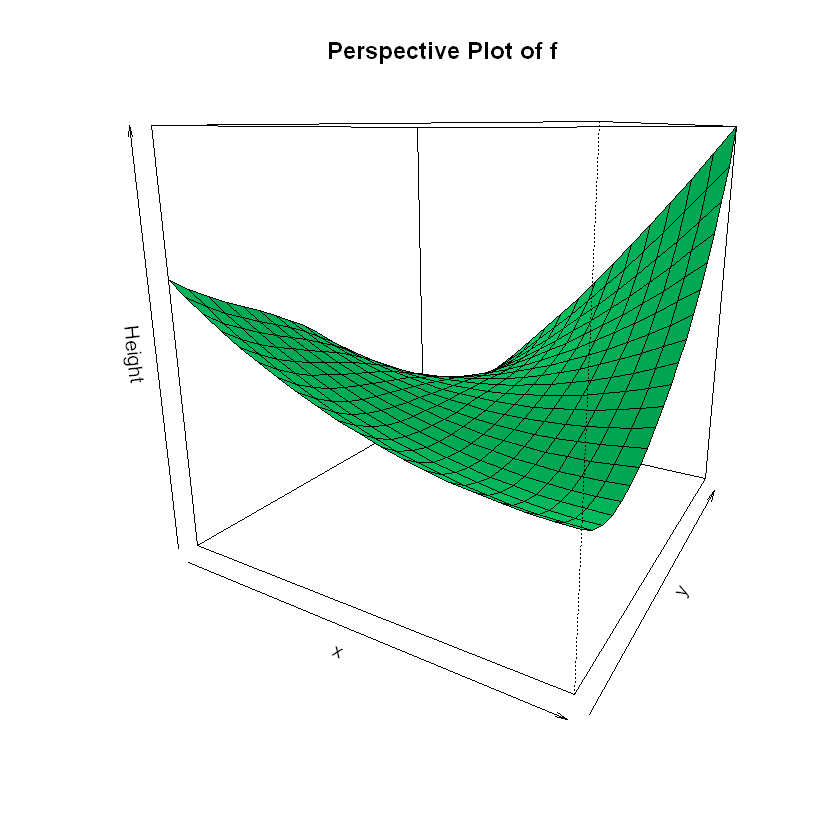

In [101]:
library(base)
w <- function(x,y) {4*x*y+(x+y^2)^2}
x <- seq(-1, 1, length= 20)
y <- seq(-1, 1, length= 20)
z <- outer(x,y,  w)
persp(x, y, z,
main="Perspective Plot of f",
zlab = "Height",
theta = 30, phi = 15,
col = "springgreen", shade = 0.5,axes=T)

In [102]:
##Set Function Gradient F f'(x)
gradf<- function (x)
  {##Calculate First Derivative of Function to x[1]  (f1)
  f1<-4*x[2]+2*(x[1] + x[2]^2)
  ##Calculate First Derivative of Function to x[2]  (f2)
  f2<-4 * x[1] + 2 * (2 * x[2] * (x[1] + x[2]^2))
  return(c(f1, f2))
  }

In [103]:
extreme <- descent(f,gradf,c(1,0) )
cat('\nExtreme points',extreme)
cat('\nGradient at extreme',gradf(extreme))



*Old x =  1 0
***New x =  0.6937454 -0.6125092
***New x =  0.8419515 -0.6866122
***New x =  0.8560183 -0.6584786
***New x =  0.8800006 -0.6704697
***New x =  0.8826649 -0.6651412
***New x =  0.8871801 -0.6673988
***New x =  0.8876923 -0.6663743
***New x =  0.8885595 -0.6668078
***New x =  0.8886582 -0.6666103
***New x =  0.8888253 -0.6666939
***New x =  0.8888444 -0.6666558
***New x =  0.8888766 -0.6666719
***New x =  0.8888803 -0.6666646
Number of iteratiions =  13
Extreme points 0.8888803 -0.6666646
Gradient at extreme -1.437692e-05 7.178024e-06

\begin{exercise}
Modify the above codes to implement the gradient ascent

\end{exercise}


Golden section for finding maximum

In [117]:
gsection <- function(ftn, x.l, x.r, x.m, tol = 1e-9) {
  # applies the golden-section algorithm to MAXIMIZE ftn
  # we assume that ftn is a function of a single variable
  # and that x.l < x.m < x.r and ftn(x.l), ftn(x.r) <= ftn(x.m)
  
  # the algorithm iteratively refines x.l, x.r, and x.m and terminates
  # when x.r - x.l <= tol, then returns x.m
  
  # golden ratio plus one
  gr1 = 1 + (1 + sqrt(5))/2
  # successively refine x.l, x.r, and x.m
  f.l = ftn(x.l)
  f.r = ftn(x.r)
  f.m = ftn(x.m)
  while ((x.r - x.l) > tol) {  
      
    if ((x.r - x.m) > (x.m - x.l)) {
      y = x.m + (x.r - x.m)/gr1
      f.y = ftn(y)
      if (f.y >= f.m) {     #MODIFIED HERE
        x.l = x.m
        f.l = f.m
        x.m = y
        f.m = f.y
        } else {
          x.r = y
          f.r = f.y
          }
      } else {
        
        y = x.m - (x.m - x.l)/gr1
        f.y = ftn(y)
        if (f.y >= f.m) {      #MODIFIED HERE
          x.r = x.m
          f.r = f.m
          x.m = y
          f.m = f.y
          } else {
            x.l = y
            f.l = f.y
            }
        }
    }
  return(x.m)
  }

Line search for a

In [118]:
line.search <- function(f, x, gradf, tol = 1e-9, a.max = 100) {
  # x and gradf are vectors of length d
  # g(a) =f(x +a*gradf) has a local maximum at a,
  # within a tolerance
  # if no local maximum is found then we use 0 or a.max for a
  # the value returned is x + a*y
  if (sum(abs(gradf)) == 0) return(x) # g(a) constant
  g <- function(a) return(f(x + a*gradf))   #MODIFIED HERE
  
  # find a.l < a.m < a.r such that
  # g(a.m) >=g(a.l)  and g(a.m) >= g(a.r)
  # a.l
  a.l <- 0
  g.l <- g(a.l)
  # a.m
  a.m <- 1
  g.m <- g(a.m)
  while ((g.m < g.l) & (a.m > tol)) { #MODIFIED HERE
    a.m <- a.m/2
    g.m <- g(a.m)
    }
  # if a suitable a.m was not found then use 0 for a
  if ((a.m <= tol) & (g.m <= g.l)) return(x)     #MODIFIED HERE
  # a.r
  a.r <- 2*a.m
  g.r <- g(a.r)
  while ((g.m < g.r) & (a.r < a.max)) { #MODIFIED HERE
    a.m <- a.r
    g.m <- g.r
    a.r <- 2*a.m
    g.r <- g(a.r)
    }
  # if a suitable a.r was not found then use a.max for a
  if ((a.r >= a.max) & (g.m < g.r)) return(x + a.max*gradf)  #MODIFIED HERE
  # apply golden-section algorithm to g to find a
  a <- gsection(g, a.l, a.r, a.m)
  return(x + a*gradf)  #MODIFIED HERE
  }

Gradient ascent

In [119]:
ascent <- function(f,gradf, x0, tol = 1e-9, n.max = 100) {
  # steepest ascent algorithm
  # find a local maximum of f starting at x0
  # function gradf is the gradient of f
  x <- x0
  x.old <- x
  cat('\n*Old x = ',x.old,'\tf(x.old)=',f(x.old))
     
  x <- line.search(f, x, gradf(x))
  cat('\n***New x = ',x,'\tNew f(x)=',f(x))
  n <- 1
    
    
  while ((f(x)-f(x.old)> tol) & (n < n.max)) {  #MODIFIED HERE
    x.old <- x
    x <- line.search(f, x, gradf(x))
    cat('\n***New x = ',x,'\tNew f(x)=',f(x))
    n <- n + 1
    }
  cat('\nNumber of iterations = ',n)
  return(x)
  }

In [120]:
f <- function(x) {
f <- -(x[1] -1  )^2 - (x[2] -1)^2 #   f = -(x-1)^2 - (y-1)^2
    
  return(f)
}

Plot the function

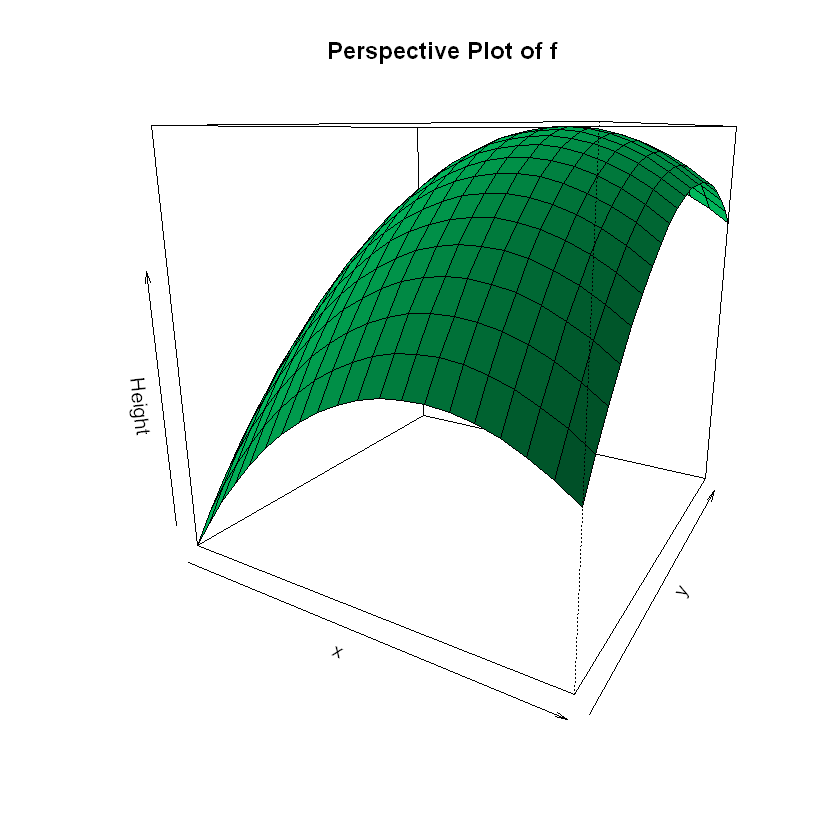

In [121]:
library(base)
w <- function(x,y) {-(x-1)^2 - (y-1)^2}
x <- seq(-3, 3, length= 20)
y <- seq(-3, 3, length= 20)
z <- outer(x,y,  w)
persp(x, y, z,
main="Perspective Plot of f",
zlab = "Height",
theta = 30, phi = 15,
col = "springgreen", shade = 0.5,axes=T)

In [122]:
##Set Function Gradient F f'(x)
gradf<- function (x)
  {##Calculate First Derivative of Function to x[1]  (f1)
  f1<- -2*(x[1] -1)
  ##Calculate First Derivative of Function to x[2]  (f2)
  f2<- -2*(x[2] -1)
  return(c(f1, f2))
  }

Run gradient ascent with chosen starting point and print extreme points found as well as the gradient of the function at that point.If the gradient is close to zero , the algorithm worked.

In [123]:
extreme <- ascent(f,gradf,c(200,200) )
cat('\nExtreme points',extreme)
cat('\nGradient at extreme',gradf(extreme))


*Old x =  200 200 	f(x.old)= -79202
***New x =  0.9999999 0.9999999 	New f(x)= -1.229839e-14
***New x =  1 1 	New f(x)= 0
Number of iterations =  2
Extreme points 1 1
Gradient at extreme 0 0

\begin{exercise}

Find the maximum of the function $$ f(x,y) = \frac{x-y}{x^2+y^2+1}$$
\end{exercise}


In [124]:
f <- function(x) {
f <- (x[1]-x[2])/(x[1]^2 + x[2]^2 +1)
    
  return(f)
}

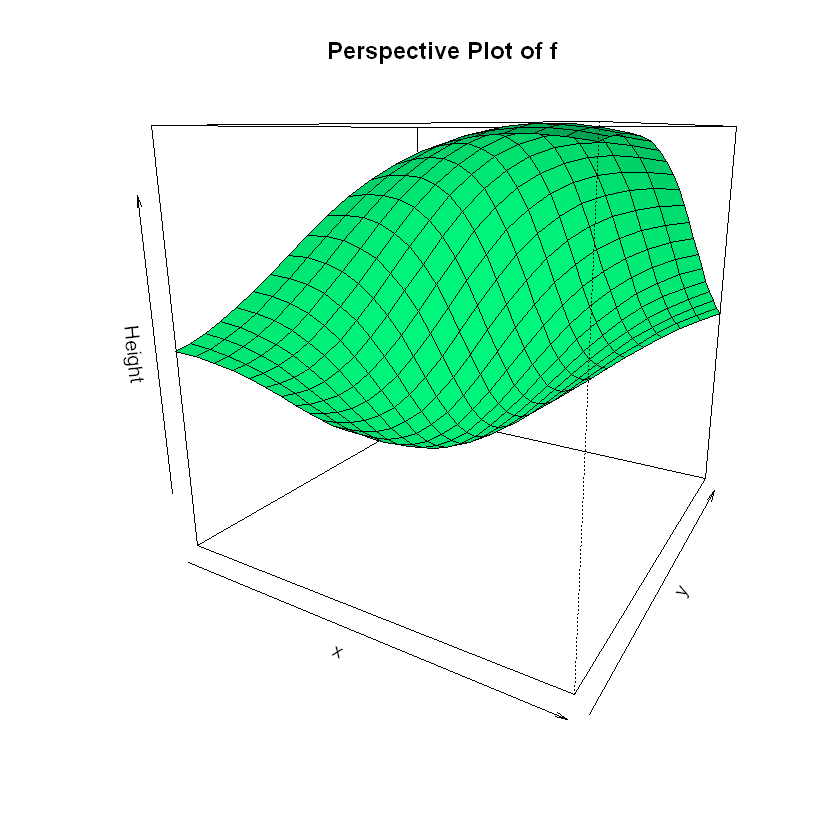

In [125]:
library(base)
w <- function(x,y) {(x-y)/(x^2 +y^2 +1)}
x <- seq(-1, 1, length= 20)
y <- seq(-1, 1, length= 20)
z <- outer(x,y,  w)
persp(x, y, z,
main="Perspective Plot of f",
zlab = "Height",
theta = 30, phi = 15,
col = "springgreen", shade = 0.5,axes=T)

In [126]:
##Set Function Gradient F f'(x)
gradf<- function (x)
  {##Calculate First Derivative of Function to x[1]  (f1)
  f1<- (1 - x[1]^2 + 2*x[1]*x[2] + x[2]^2)/(1 + x[1]^2 + x[2]^2)^2
  ##Calculate First Derivative of Function to x[2]  (f2)
  f2<- (-1 - x[1]^2 - 2*x[1]*x[2] + x[2]^2)/(1 + x[1]^2 + x[2]^2)^2
  return(c(f1, f2))
  }

Run gradient ascent with chosen starting point and print extreme points found as well as the gradient of the function at that point.If the gradient is close to zero , the algorithm worked.

In [127]:
extreme <- ascent(f,gradf,c(10,-10) )
cat('\nExtreme points',extreme)
cat('\nGradient at extreme',gradf(extreme))


*Old x =  10 -10 	f(x.old)= 0.09950249
***New x =  9.507438 -9.507438 	New f(x)= 0.1046022
***New x =  8.963383 -8.963383 	New f(x)= 0.110875
***New x =  8.352545 -8.352545 	New f(x)= 0.118872
***New x =  7.651081 -7.651081 	New f(x)= 0.1295936
***New x =  6.818528 -6.818528 	New f(x)= 0.1450988
***New x =  5.777166 -5.777166 	New f(x)= 0.1705404
***New x =  4.344751 -4.344751 	New f(x)= 0.2242237
***New x =  1.897522 -1.897522 	New f(x)= 0.4627436
***New x =  0.7071068 -0.7071068 	New f(x)= 0.7071068
***New x =  0.7071068 -0.7071068 	New f(x)= 0.7071068
Number of iterations =  10
Extreme points 0.7071068 -0.7071068
Gradient at extreme 1.247416e-09 -1.247416e-09

In [128]:
f(extreme)

[1] 0.7071068

We double checked with Wolfram Alpha  https://www.wolframalpha.com/input/?i=(x-y)%2F(x%5E2+%2B+y%5E2+%2B1)

In [25]:
g <- function(x) {-(x[1]-x[2])/(x[1]**2+x[2]**2+1)}
gradg <- function(x)
    {
 .e1 <- -2*x[1]*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**2 + 1/(x[1]**2 + x[2]**2 + 1)
    .e2 <- -2*x[2]*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**2 - 1/(x[1]**2 + x[2]**2 + 1)
    c(-.e1,-.e2)
}
#gradg <- function (x) 
#{
#    .e2 <- 1 + x[1]^2 + x[2]^2
#    .e3 <- x[1] - x[2]
#    c( -(1 - 2 * (x[1] * .e3/.e2))/.e2,  ((1 + 2 * (x[2] * .e3/.e2))/.e2))
#}

Hg <-function(x) 
{
    
    row1 <- c(8*x[1]**2*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**3 - 4*x[1]/(x[1]**2 + x[2]**2 + 1)**2 
             - 2*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**2, 
             8*x[1]*x[2]*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**3 + 2*x[1]/(x[1]**2 + x[2]**2 + 1)**2 
             - 2*x[2]/(x[1]**2 + x[2]**2 + 1)**2)

    row2 <- c(8*x[1]*x[2]*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**3 + 2*x[1]/(x[1]**2 + x[2]**2 + 1)**2 
             - 2*x[2]/(x[1]**2 + x[2]**2 + 1)**2, 
             8*x[2]**2*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**3 + 4*x[2]/(x[1]**2 + x[2]**2 + 1)**2 
             - 2*(x[1] - x[2])/(x[1]**2 + x[2]**2 + 1)**2)
    matrix(-c(row1,row2),nrow=2,ncol=2)
}    
    

x0<- c(sqrt(2.)/2.,-sqrt(2.)/2.)
Hg(x0)

7.071068e-01,1.110223e-16
1.110223e-16,7.071068e-01


In [32]:

descent(g,gradg,c(10,1))


[1]  0.7071068 -0.7071068

In [27]:
descent(g,gradg,c(0,1))

[1] 0 1

## Steepest Ascent

![ascent](http://d.pr/i/6I6b+)


\begin{remark}
Notice zig-zag pattern: direction of steepest ascent changes at each x

Inefficient! How can we speed convergence?

\end{remark}


## Newton's Method


Recall that Newton's method uses second derivative information (Hessian, in multivariate terms). Adding second-order information about the function might speed convergence!

Again, we seek $\mathbf{x}^*$ such that $\nabla f(\mathbf{x}^*)=\mathbf{0}$.

Recall (hopefully), the Taylor expansion of $f$ about some point $\mathbf{x}_0$:

$f(\mathbf{x}) = f(\mathbf{x}_0) + (\mathbf{x} - \mathbf{x}_0)' \nabla f(\mathbf{x}) + \frac{1}{2}(\mathbf{x} - \mathbf{x}_0)'H(\mathbf{x})(\mathbf{x} - \mathbf{x}_0) + \ldots$

After some substitution and math, this becomes:

$f(\mathbf{x}) \approx f(\mathbf{x}_0) + \alpha \mathbf{v}' \nabla f(\mathbf{x}_0) + \frac{1}{2}\alpha^2 \mathbf{v}' H(\mathbf{x}_0)\mathbf{v}$



## Presenter Notes

Taylor series is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point.


## Newton's Method


Take first-order partial derivatives on both sides, and set equal to $\mathbf{0}$:

$$\nabla f(\mathbf{x}) \approx \nabla f(\mathbf{x}_0) + H(\mathbf{x}_0)(\mathbf{x}-\mathbf{x}_0) = 0$$

Solving for $\mathbf{x}$ gives:

$$\mathbf{x} = \mathbf{x}_0 - H(\mathbf{x}_0)^{-1} \nabla f(\mathbf{x}_0)$$

So, Newton's method is:

$$\mathbf{x}_{i+1} = \mathbf{x}_i - H(\mathbf{x}_i)^{-1} \nabla f(\mathbf{x}_i)$$

If $f$ has local maximum at $\mathbf{x}^*$, is "well-behaved" near $\mathbf{x}^*$, and initial point $\mathbf{x}_0$ is "close enough" to $\mathbf{x}^*$, *Newton's method will converge*.

## Presenter Notes


Note that H(x) must be non-singular!



`solve` function
================

Remember that the function `solve` in R is used to obtain the inverse of a matrix `a`:

    !r
    solve(a, b, ...)

If you only pass the first matrix `a`, it will assume `b` to be the identity matrix, and so the solution to `ax = b` will be the inverse of `a`. More generally, this is solved by $a^{-1}b$, which is the term that we require to use Newton's method.

Thus, we must pass the Hessian evaluated at $\mathbf{x}$ and the gradient of $f$ evaluated at $\mathbf{x}$ as the arguments to `solve`.

In [33]:
## R Code

# Here is an implementation of Newton's method in R:

newton <- function(H, grad, x0, eps = 1e-9, max_iter = 100) {

    x <- x0
    gradx <- grad(x)
    Hx <- H(x)
    i <- 0
    while ((max(abs(gradx)) > eps) && (i < max_iter)) {
        x <- x - solve(Hx, gradx)
        gradx <- grad(x)
        Hx <- H(x)
        i <- i + 1
    }
    if (i == max_iter) {
        cat('newton failed to converge\n')
    } else {
        return(x)
    }
}

## Newton's Method


![newton](http://cl.ly/S5YB/Screenshot%202012-10-14%20at%2015.09.48.png)

In [35]:
x0<-c(sqrt(2)/2.+1,-sqrt(2)/2.-1)
newton(Hg,gradg,x0)

[1]  27639.66 -27639.66

In [60]:
install.packages("stats")

Installing package into '/home/nbuser/R'
(as 'lib' is unspecified)
Warning message:
"package 'stats' is not available (for R version 3.4.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

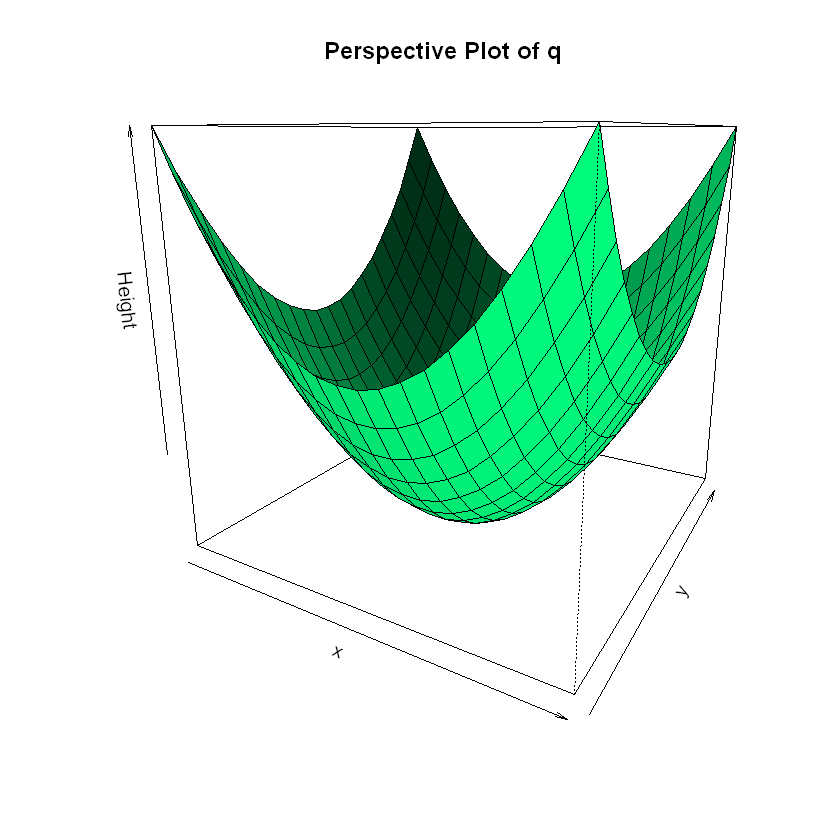

In [6]:
library(base)
q<- function(x,y) {x**2+y**2+1}
x <- seq(-1, 1, length= 20)
y <- seq(-1, 1, length= 20)
z <- outer(x,y,  q)
persp(x, y, z,
main="Perspective Plot of q",
zlab = "Height",
theta = 30, phi = 15,
col = "springgreen", shade = 0.5)

In [36]:
# Testing the algorithms (check them for known solutions)
library(optimx)
w <- function(x) {(x[1]**2+x[2]**2)+1}
gradw <- function(x) {
    c(2*x[1],2*x[2])
}
Hw <- function(x) {
    matrix(c(2,0,0,2),nrow = 2,ncol=2)
}

x0=c(1,1)
newton(Hw,gradw,x0)
descent(w,gradw,x0)
res <- optimx(x0,w , gradw, method = "BFGS")
res

[1] 0 0

[1] -6.28291e-09 -6.28291e-09

,p1,p2,value,fevals,gevals,niter,convcode,kkt1,kkt2,xtimes
BFGS,-2.220446e-16,-2.220446e-16,1,4,3,NA,0,TRUE,TRUE,0.001


In [38]:
x0=c(1,-1)
pmt <- proc.time()
newton(Hg,gradg,x0)
pmt1 <- proc.time()-pmt
pmt1
descent(g,gradg,x0)
pmt2 <- proc.time() - pmt1
pmt2
optimx(x0,g , gradg, method = "BFGS")
pmt3 <- proc.time()-pmt2
pmt3
optimx(x0,g)
pmt4 <- proc.time() - pmt3
pmt4




[1]  0.7071068 -0.7071068

   user  system elapsed 
  0.007   0.000   0.007 

[1]  0.7071068 -0.7071068

    user   system  elapsed 
   6.856    1.119 8889.399 

,p1,p2,value,fevals,gevals,niter,convcode,kkt1,kkt2,xtimes
BFGS,0.7071068,-0.7071068,-0.7071068,16,8,NA,0,TRUE,TRUE,0.001


   user  system elapsed 
  0.899   0.000   0.899 

,p1,p2,value,fevals,gevals,niter,convcode,kkt1,kkt2,xtimes
Nelder-Mead,0.7070159,-0.7070591,-0.7071068,49,NA,NA,0,TRUE,TRUE,0.001
BFGS,0.7071071,-0.7071071,-0.7071068,17,8,NA,0,TRUE,TRUE,0.000


    user   system  elapsed 
   6.956    1.119 8889.499 

In [26]:
# dependence of Newton from initial guess of the minimizer

x0=c(2,-1)
pmt <- proc.time()
newton(Hg,gradg,x0)
pmt1 <- proc.time()-pmt
pmt1
descent(g,gradg,x0)
pmt2 <- proc.time() - pmt1
pmt2
optimx(x0,g , gradg, method = "BFGS")
pmt3 <- proc.time()-pmt2
pmt3
optimx(x0,g)
pmt4 <- proc.time() - pmt3
pmt4


[1]  51979.03 -20127.06

   user  system elapsed 
  0.007   0.000   0.006 

[1]  0.7071068 -0.7071068

    user   system  elapsed 
  10.411    1.634 3392.368 

Warning message in optimx.run(par, optcfg$ufn, optcfg$ugr, optcfg$uhess, lower, :
"Hessian is reported non-symmetric with asymmetry ratio 8.24659034561329e-12"Warning message:
"Hessian forced symmetric"

,p1,p2,value,fevals,gevals,niter,convcode,kkt1,kkt2,xtimes
BFGS,0.7071083,-0.7071075,-0.7071068,19,11,NA,0,TRUE,NA,0


   user  system elapsed 
  0.083   0.000   0.082 

,p1,p2,value,fevals,gevals,niter,convcode,kkt1,kkt2,xtimes
Nelder-Mead,0.7070382,-0.7071353,-0.7071068,57,NA,NA,0,TRUE,TRUE,0
BFGS,0.7071088,-0.7071077,-0.7071068,20,11,NA,0,TRUE,TRUE,0


    user   system  elapsed 
  10.531    1.634 3392.488 

In [1]:
# Finds the critical point of a given function "symbolically" (analytically)
from sympy import *
x=Symbol('x')
y=Symbol('y')
f=(x-y)/(x**2+y**2+1)
print ('displays the function in latex form',latex(f))
print ('displays the function if python form', f)
f.diff(x)# finds the partial derivative of f with respect to x
f.diff(y) # finds the partial derivative of f with respect to y
fgrad=[f.diff(x),f.diff(y)] # gradient of f
print ('displays the gradient of f', fgrad)
xopt=solve(fgrad,[x,y]) # solves the necessary equations for finding the extreme points
print ('displays the extreme point found',xopt)

displays the function in latex form \frac{x - y}{x^{2} + y^{2} + 1}
displays the function if python form (x - y)/(x**2 + y**2 + 1)
displays the gradient of f [-2*x*(x - y)/(x**2 + y**2 + 1)**2 + 1/(x**2 + y**2 + 1), -2*y*(x - y)/(x**2 + y**2 + 1)**2 - 1/(x**2 + y**2 + 1)]
displays the extreme point found [(-sqrt(2)/2, sqrt(2)/2), (-sqrt(2)/2, sqrt(2)/2), (sqrt(2)/2, -sqrt(2)/2), (sqrt(2)/2, -sqrt(2)/2)]


In [2]:
""" Identify the type of critical point (maximum, minimum, sandle) by computing the Hessian 
at the critical point and finding its  eigenvalues and eigenvectors """
H=hessian(f,[x,y])
print ('hessian',H)
H=hessian(f,[x,y]).evalf(subs=({x:sqrt(2.)/2.,y:-sqrt(2.)/2.}))
print ('displays the Hessian of f',H)
#Computes the eigenvalues of H
HE=H.eigenvals()
print ('Displays the eigenvalues and their multiplicity', HE)
#Computes the eigenvectors of H
HEV=H.eigenvects()
print ('Displays the eigenvalues, multiplicity, and basis',HEV)

hessian Matrix([[8*x**2*(x - y)/(x**2 + y**2 + 1)**3 - 4*x/(x**2 + y**2 + 1)**2 - 2*(x - y)/(x**2 + y**2 + 1)**2, 8*x*y*(x - y)/(x**2 + y**2 + 1)**3 + 2*x/(x**2 + y**2 + 1)**2 - 2*y/(x**2 + y**2 + 1)**2], [8*x*y*(x - y)/(x**2 + y**2 + 1)**3 + 2*x/(x**2 + y**2 + 1)**2 - 2*y/(x**2 + y**2 + 1)**2, 8*y**2*(x - y)/(x**2 + y**2 + 1)**3 + 4*y/(x**2 + y**2 + 1)**2 - 2*(x - y)/(x**2 + y**2 + 1)**2]])
displays the Hessian of f Matrix([[-0.707106781186547, -4.83364665672646e-17], [-4.83364665672646e-17, -0.707106781186547]])
Displays the eigenvalues and their multiplicity {-3535533905932734758317667163677/5000000000000000000000000000000: 1, -3535533905932735241682332836323/5000000000000000000000000000000: 1}
Displays the eigenvalues, multiplicity, and basis [(-0.707106781186547, 1, [Matrix([
[1.0],
[1.0]])]), (-0.707106781186547, 1, [Matrix([
[-1.0],
[ 1.0]])])]


\begin{exercise}
Identify the critical points and the type of extreme values of the function $$f(x,y) = (x+y)(xy+xy^2)$$
\end{exercise}


In [58]:
#helper function to see the signs of the hessian's eigenvalues
def eigensign(HE):
    for i in range(0,len(list(HE.keys()))):
        print('Eigenvalue',i+1,'is')
        if(list(HE.keys())[i] > 0 ):
            print('positive')      
        elif(list(HE.keys())[i]==0):
            print('zero')     
        else:
            print('negative')



In [1]:
from sympy import *
x=Symbol('x')
y=Symbol('y')

f=(x+y)*(x*y+x*y**2)

fgrad=[f.diff(x),f.diff(y)]
xopt=solve(fgrad,[x,y])
xopt


[(0, -1), (0, 0), (3/8, -3/4), (1, -1)]

1st critical point :   (0, -1) 

In [59]:
""" Identify the type of critical point (maximum, minimum, sandle) by computing the Hessian 
at the critical point and finding its  eigenvalues and eigenvectors """
H=hessian(f,[x,y])
print ('hessian',H)
H=hessian(f,[x,y]).evalf(subs=({x:0,y:-1}))
print ('displays the Hessian of f',H)
#Computes the eigenvalues of H
HE=H.eigenvals()
print ('Displays the eigenvalues and their multiplicity', HE)
eigensign(HE)

hessian Matrix([[2*y**2 + 2*y, 2*x*y + x + y**2 + y + (x + y)*(2*y + 1)], [2*x*y + x + y**2 + y + (x + y)*(2*y + 1), 4*x*y + 2*x*(x + y) + 2*x]])
displays the Hessian of f Matrix([[0.e-125, 1.00000000000000], [1.00000000000000, 0]])
Displays the eigenvalues and their multiplicity {-sqrt(1789931494904685075276173995854677405670108698260665783090090606394441500334556509959080266614039273464334969326187482504649803797317086043777814127597786226282054644248700756391675078842436173515315000514484077967245659600421098975959924194154643457)/42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472384 + 1/42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472384: 1, 1/42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472384 + sqrt(17899314949046850752761739958546774056701086982606657830900906063

2nd critical point :  (0, 0)

In [60]:
H=hessian(f,[x,y]).evalf(subs=({x:0,y:0}))
print ('displays the Hessian of f',H)
#Computes the eigenvalues of H
HE=H.eigenvals()
print ('Displays the eigenvalues and their multiplicity', HE)
eigensign(HE)

displays the Hessian of f Matrix([[0, 0], [0, 0]])
Displays the eigenvalues and their multiplicity {0: 2}
Eigenvalue 1 is
zero


3rd critical point :  (3/8, -3/4)

In [61]:
H=hessian(f,[x,y]).evalf(subs=({x:3/8,y:-3/4}))
print ('displays the Hessian of f',H)
#Computes the eigenvalues of H
HE=H.eigenvals()
print ('Displays the eigenvalues and their multiplicity', HE)
eigensign(HE)

displays the Hessian of f Matrix([[-0.375000000000000, -0.187500000000000], [-0.187500000000000, -0.656250000000000]])
Displays the eigenvalues and their multiplicity {-3/4: 1, -9/32: 1}
Eigenvalue 1 is
negative
Eigenvalue 2 is
negative


4th and final critical point : (1, -1)

In [62]:
H=hessian(f,[x,y]).evalf(subs=({x:1,y:-1}))
print ('displays the Hessian of f',H)
#Computes the eigenvalues of H
HE=H.eigenvals()
print ('Displays the eigenvalues and their multiplicity', HE)
eigensign(HE)

displays the Hessian of f Matrix([[0.e-125, -1.00000000000000], [-1.00000000000000, -2.00000000000000]])
Displays the eigenvalues and their multiplicity {-sqrt(3579862989809370150552347991709354811340217396521331566180181212788883000669113019918160533228078546928669938652374965009299692209798177239376294100355000647257207324296820940779418592730667470971908248881233780153427602757302689627059051378172231681)/42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472384 - 42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472383/42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472384: 1, -42307582002575910332922579714097346549017899709713998034217522897561970639123926132812109468141778230245837569601494931472383/42307582002575910332922579714097346549017899709713998034217522897561970639123

We can conclude that:  
* At (0, -1) we have a saddle point because the eigenvalues have opposite signs.
* At (3/8, -3/4) we have a maximum because the eigenvalues are negative.
* At (1, -1) we have a saddle point because the eigenvalues have opposite signs.
* At (0,0) we dont know what is going on because the eigenvalues are zero.We need more information (its actually a saddle point according to Wolfram Alpha)

# Why optimization in ML?

## Context: Logistic Regression
============================

Logistic regression models binary outcomes as a function of zero or more covariates.

$$y_i \in \{0,1\}$$

$$\begin{aligned}f(\mathbf{x}) &= g(\mathbf{\theta}'\mathbf{x}) = g(\theta_0 + \theta_1 x_1 + \ldots + \theta_k x_k) \cr
&= \text{logit}(\mathbf{\theta}'\mathbf{x}) \cr
&= \frac{1}{1+e^{-\mathbf{\theta}'\mathbf{x}}} \cr
&= Pr(y=1 | \mathbf{x}, \mathbf{\theta}) = p
\end{aligned}$$

Hence,

$$Pr(y=0 | \mathbf{x}, \mathbf{\theta}) = 1 - f(\mathbf{x})$$


## Likelihood Function
===================

The likelihood function describes how likely a set of possible parameter values are, given a set of observed outcomes. The value of the likelihood function for a given parameter value is equal to the probability of the observations, given that parameter value.

For logistic regression,

$$L(\theta) = p^y + (1-p)^{1-y}$$

which is identical to the Bernoulli probability mass function.

We want to select suitable values for the logistic regression parameters. A reasonable choice is to select $\mathbf{\theta}$ that maximize the likelihood function.

For ordinary multivariate regression, this is easy:

$$\hat{\mathbf{\theta}} = (X'X)^{-1}X'\mathbf{y}$$

This *least squares* solution, however, cannot be applied to logistic regression.


## Maximizing the Likelihood
=========================

It is often simpler to work with the likelihood function on the logarithmic scale:

$$\log L(\theta) = \sum_i y_i \log p_i + (1-y_i) \log(1-p_i)$$

To maximize, we take the (partial) derivative with respect to $\theta_j$:

$$\begin{aligned}\frac{\partial}{\partial \theta_j} \log L(\mathbf{\theta}) &= \frac{1}{n} \sum_i (f(\mathbf{x}_i) - y_i) \mathbf{x}_i \cr
&= \frac{1}{n} \mathbf{x}'(\mathbf{p} - \mathbf{y}) = \nabla J
\end{aligned}$$

We could use this to search for $\theta^*$ using gradient ascent, but we learned that this may be inefficient.

## Newton's method
===============

Now, the Hessian:

$$H(\mathbf{\theta}) = \frac{1}{n} \sum_i \left[ \mathbf{x}_i'f(\mathbf{x}_i)(1-f(\mathbf{x}_i)) \mathbf{x}_i \right]$$

Update rule:

$$\mathbf{\theta}_{i+1} = \mathbf{\theta}_i - H^{-1} \nabla J$$

### Important Note
=================

For most algorithms the direction $p_k = -B^{-1}_{k}\nabla f_k$ where $B_k$ is symmetric nonsingular matrix

  steepest descent: $$B_k = I$$
  Newton's method: $$B_k = \nabla^2 f(x_k)$$
  Quasi - Newton method: $$ B_k \approx \nabla^2 f(x_k)$$ 
  


## Conjugate Gradient
==================

Conjugate Gradient Method is a first-order derivative optimization method for multidimensional nonlinear unconstrained functions. It is related to other first-order derivative optimization algorithms such as Steepest Descent.

The information processing objective of the technique is to locate the extremum of a function. From a starting position, the method first computes the gradient to locate the direction of steepest descent, then performs a line search to locate the optimum step size (alpha). The method then repeats the process of computing the steepest direction, computes direction of the search, and performing a line search to locate the optimum step size. A parameter beta defines the direction update rule based on the gradient and can be computed using one of a number of methods.

The difference between Conjugate Gradient and Steepest Descent is that it uses conjugate directions rather than local gradients to move downhill towards the function minimum, which can be very efficient.

\begin{definition}
Conjugate Directions Definition. Two vectors, $d1$ and $d2$, are Q-orthogonal (or conjugate with respect to Q) if $d1^T Q d2 = 0$. 

\end{definition}



The example provides a code listing of the Conjugate Gradient method in R solving a two-dimensional nonlinear optimization function.

In [8]:
install.packages("stats")

Installing package into 'C:/Users/elias/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'stats' is not available (for R version 3.4.3)"Warning message:
"package 'stats' is a base package, and should not be updated"

Warning message:
"package 'optimx' was built under R version 3.4.4"

[1] 0.8896844 0.7918071
[1] 0.01217674
function gradient 
     408      101 


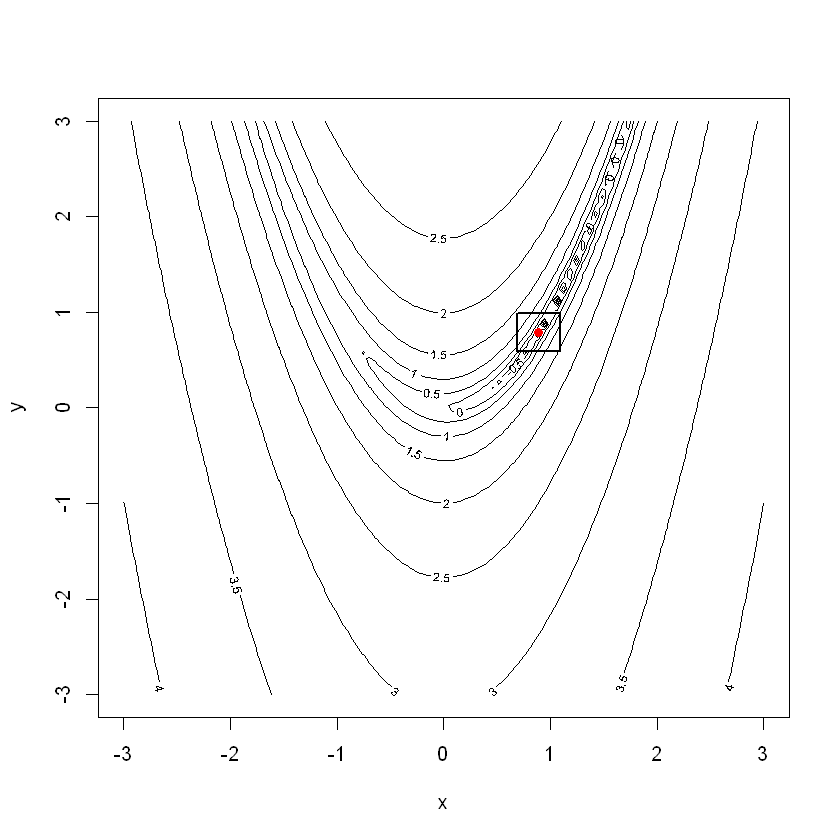

In [10]:
library(optimx)
rosenbrock <- function(v) { 
(1 - v[1])^2 + 100 * (v[2] - v[1]*v[1])^2
}

# definition of the gradient of the 2D Rosenbrock function
derivative <- function(v) {
c(-400 * v[1] * (v[2] - v[1]*v[1]) - 2 * (1 - v[1]), 
200 * (v[2] - v[1]*v[1]))
}

# locate the minimum of the function using the Conjugate Gradient method
result <- optim(
c(runif(1,-3,3), runif(1,-3,3)), # start at a random position
rosenbrock, # the function to minimize
derivative, # no function gradient 
method="CG", # use the Conjugate Gradient method
control=c( # configure Conjugate Gradient
maxit=100, # maximum iterations of 100
reltol=1e-8, # response tolerance over-one step
type=2)) # use the Polak-Ribiere update method

# summarize results
print(result$par) # the coordinate of the minimum
print(result$value) # the function response of the minimum
print(result$counts) # the number of function calls performed

# display the function as a contour plot
x <- seq(-3, 3, length.out=100)
y <- seq(-3, 3, length.out=100)
z <- rosenbrock(expand.grid(x, y))
contour(x, y, matrix(log10(z), length(x)), xlab="x", ylab="y")
# draw the optima as a point
points(result$par[1], result$par[2], col="red", pch=19)
# draw a square around the optima to highlight it
rect(result$par[1]-0.2, result$par[2]-0.2, result$par[1]+0.2, result$par[2]+0.2, lwd=2)

## Conjugate Directions
=====================

 
Having performed a line minimization along a direction $u$ we would like to choose a new direction $v$ so that minimizing along $v$ will not `spoil' the minimization along $u$. We can determine such a direction by using the Taylor approximation at $a$


$$f(a+x) \approx f(a) - \nabla f(a)x + \frac{1}{2}x^THx$$


The gradient of $f$ near $a$ is given by

$$\nabla f(a+x) = Hx - b$$
If we have just minimized along a direction $u$ then the component of the gradient along $u$ must be zero, thus the gradient itself is perpendicular to $u$

$$ \nabla f \cdot u = 0$$

As we now move along some direction $v$ the gradient changes by

$$ \delta (\nabla f) = Hv $$

In order not to interfere with our $u$ minimization we require that the gradient remain perpendicular to u, ie that the change in gradient itself be perpendicular to u. This is simply

$$u^THv=0$$

Two vectors, $u$, $v$, having this property are said to be conjugate. A set of vectors for which this holds for all pairs is a conjugate set.

If we minimize along each of a conjugate set of n directions we will get closer to the minimum efficiently. If the function has an exact quadratic form, one pass through the set will get us exactly to the minimum. Otherwise we must repeat the cycle a number of times.

The problem is, how do we generate such a conjugate set? If $f$ is second-differentiable we can calculate $H$ and generate the set using algebraic techniques. However, there are much more effective methods available in such cases. If no derivatives are available a method due to Powell can be used which generates a conjugate set a sequence of line minimizations. It starts by assuming a set consisting of the unit directions, then gradually calculates new directions from the results of the search. Each n line minimizations gives an extra conjugate direction, so a full set is derived after line minimizations. 